# Description
In this notebook we fit the logistic and linear glucose calibration models.

In [1]:
import numpy
import pandas
from matplotlib import pyplot
import pathlib

import calibr8

import models

DP_PROCESSED = pathlib.Path("processed")

In [2]:
df_data = pandas.read_excel(DP_PROCESSED / "glucose_calibration_data.xlsx", index_col=0)
X = df_data.index.values
Y = df_data.absorbance.values

### Logistic model

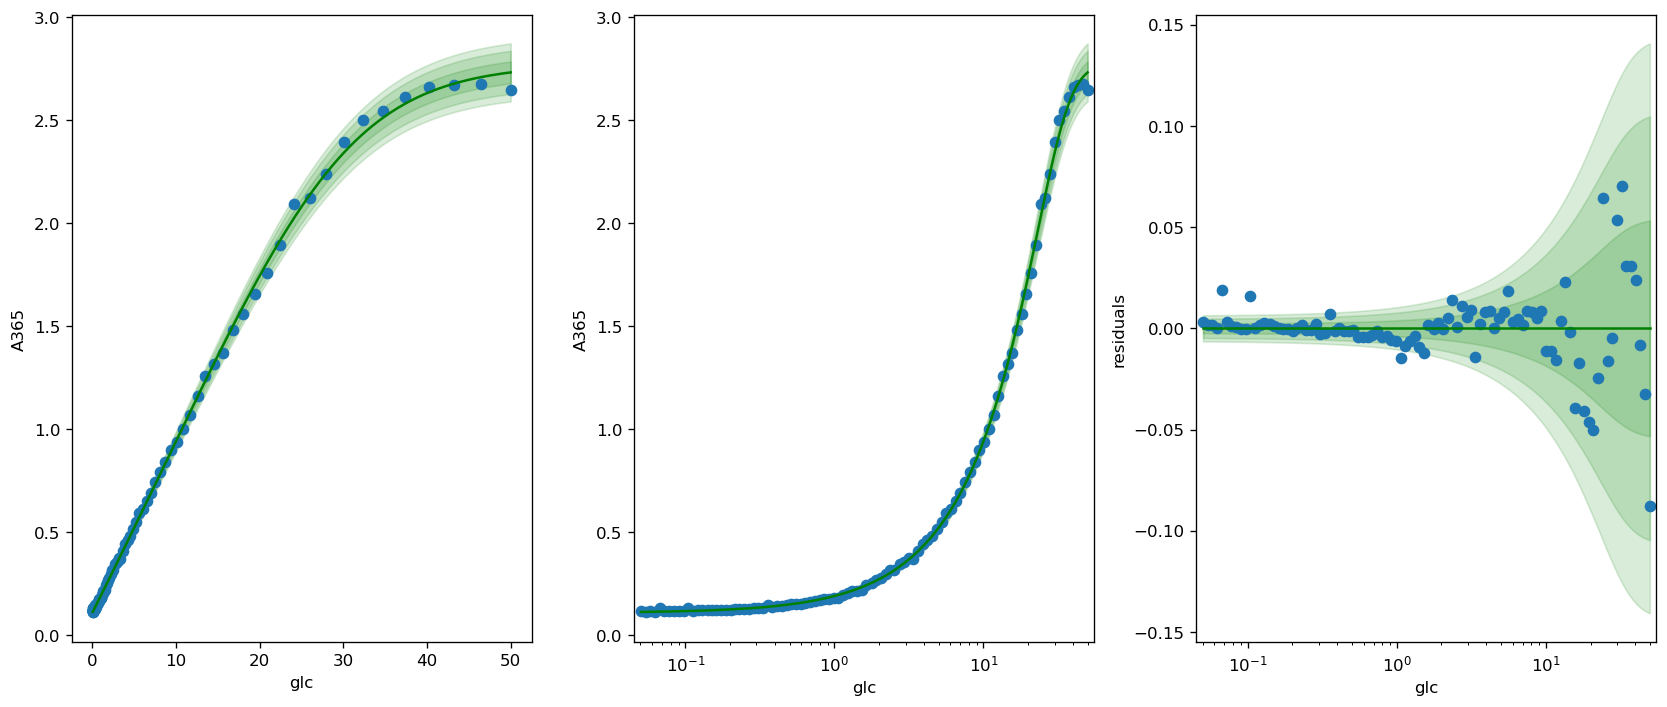

[-7.09902609e+00  2.77250637e+00  8.55537409e+00  8.42516679e-02
  2.43752124e+00  1.99678790e-04  1.64245644e-02  3.10334334e+00]


In [3]:
model = models.LogisticGlucoseCalibrationModelV1(
    independent_key="glc", dependent_key="A365"
)
theta_guess = [-3, 3, 2, 0.1, 3, 0.05, 0.01, 2]
theta_bounds = [
    (-numpy.inf, 0.3),
    (2.5, 4),
    (-20, 20),
    (0, 1),
    (-3, 3),
    (1e-6, 0.1),
    (0, 0.05),
    (1, 20),
]

theta_fitted, history_mle = calibr8.fit_scipy(
    model,
    independent=X,
    dependent=Y,
    theta_guess=theta_guess,
    theta_bounds=theta_bounds,
)
model.save(DP_PROCESSED / "glucose_logistic.json")

fig, axs = calibr8.plot_model(model)
pyplot.tight_layout()
pyplot.show()
print(theta_fitted)

### Linear model, data cut to the linear range

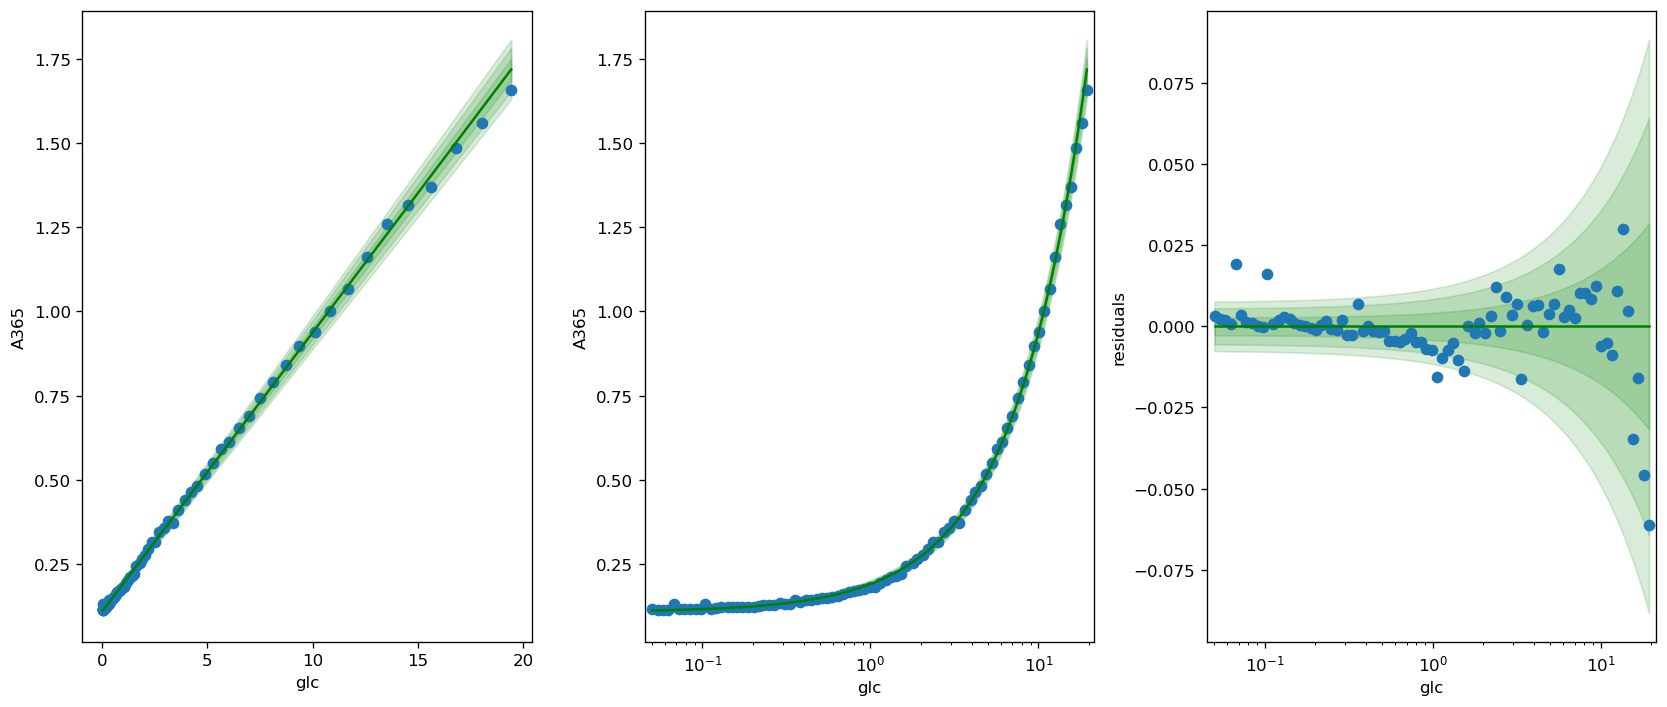

[1.09136039e-01 8.28183019e-02 5.74433153e-04 1.49451064e-02
 2.73083940e+00]


In [4]:
mask = numpy.logical_and(X > 0, X <= 20)
X_lin = X[mask]
Y_lin = Y[mask]

model = models.LinearGlucoseCalibrationModelV1(
    independent_key="glc", dependent_key="A365"
)
theta_guess = [0, 0.1, 0.01, 0.01, 3]
theta_bounds = [(0, 0.5), (0, 1), (1e-6, 0.1), (0, 0.1), (1, 20)]

theta_fitted, history_mle = calibr8.fit_scipy(
    model,
    independent=X_lin,
    dependent=Y_lin,
    theta_guess=theta_guess,
    theta_bounds=theta_bounds,
)
model.save(DP_PROCESSED / "glucose_linear.json")

fig, axs = calibr8.plot_model(model)
pyplot.tight_layout()

pyplot.show()
print(theta_fitted)

In [5]:
%load_ext watermark
%watermark

Last updated: 2021-05-05T18:23:28.328605+02:00

Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.19.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 6
Architecture: 64bit

